Στo πλαίσιo της τελικής εργασίας σας, ζητείται να αναλύσετε ένα μεγάλο αριθμό δεδομένων (τουλάχιστον 200 άρθρα) τα οποία αναφέρονται σε ένα ελληνικό θέμα και συγκεκριμένα στην ελληνική ειδησεογραφία. Επιλέξτε ένα δικό σας θέμα π.χ. εκλογές, οικονομία, Ουκρανία κλπ. Το σύνολο (ή ένα μέρος) των δεδομένων να έχουν εξορυχθεί από το διαδίκτυο με τεχνικές scraping (Beautiful Soup).

In [ ]:
#Επιλέγω να μελετήσω Οικονομία από το in.gr
#Ξεκινάω με την εγκατάσταση των απαραίτητων βιβλιοθηκών
!pip install requests
!pip install beautifulsoup4
!pip install pandas

1. Να εξορύξετε τα δεδομένα σας με χρήση scraping

In [ ]:
#Βήμα1: ¨Ήρθε η ώρα για scraping. Τα άρθρα feedάρουν με δύο διαφορετικούς τρόπους. Ο ένας είναι σαν widget και ο άλλος είναι σε σειρά.
#Ξεκινάμε με τα άρθρα που είναι σε widget

import requests
from bs4 import BeautifulSoup

# URL της ιστοσελίδας με τα άρθρα στην κατηγορία οικονομίας
url = 'https://www.in.gr/economy/'

# Αποστολή αιτήματος GET
response = requests.get(url)

# Έλεγχος αν το αίτημα ήταν επιτυχές
if response.status_code == 200:
    # Δημιουργία αντικειμένου BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Εύρεση όλων των τίτλων των άρθρων στη σελίδα
    titles = soup.find_all('h3', class_='o-head whsk-is-size-normal is-darkblue is-semibold')

    # Εκτύπωση όλων των τίτλων
    for title in titles:
        print(title.get_text().strip())
else:
    print("Error: Unable to fetch the page.")

Πώς αλλάζει η επενδυτική συμπεριφορά των ελληνικών επιχειρήσεων
Άλμα στον δείκτη ανασφάλειας και εκτίναξη κόστους για τους μικρομεσαίους - Έλλειψη ρευστότητας για το 50%
«Φωτιά» οι τιμές στα καλοκαιρινά φρούτα - Δείτε πόσο κοστίζουν
H Samsung αντιμέτωπη με τη μεγαλύτερη απεργία στην ιστορία της


In [ ]:
#Συνεχίζουμε με τα άρθρα που είναι σε σειρά
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL της ιστοσελίδας με τα άρθρα στην κατηγορία οικονομίας
url = 'https://www.in.gr/economy/'

# Αποστολή αιτήματος GET
response = requests.get(url)

# Έλεγχος αν το αίτημα ήταν επιτυχές
if response.status_code == 200:
    # Δημιουργία αντικειμένου BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Εύρεση όλων των συνδέσμων με τους τίτλους των άρθρων
    article_links = soup.find_all('a', class_='is-block hover-underline')

    data = []

    # Για κάθε σύνδεσμο, εξαγωγή του τίτλου και του συνδέσμου
    for link in article_links:
        title = link.find('h3', class_='o-head whsk-is-size-normal whsk-is-size-small-touch is-darkblue is-semibold')
        if title:
            article_title = title.get_text().strip()
            article_url = link['href']
            data.append({'title': article_title, 'url': article_url})

    # Δημιουργία DataFrame με τα δεδομένα
    df = pd.DataFrame(data)
    print(df)
else:
    print("Error: Unable to fetch the page.")

                                                title  \
0   Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...   
1   Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...   
2   Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...   
3   Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...   
4   Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...   
..                                                ...   
63  Οι Κινέζοι αποφεύγουν τους αμερικανικούς δασμο...   
64  Το λάθος που έδιωξε την «αρκούδα» της Wall Str...   
65   Η Κίνα προκαλεί… αρρυθμίες στην αγορά πετρελαίου   
66  Τα δύο σενάρια για τη Γαλλία που «παίζουν» οι ...   
67  Αεροπορικά ταξίδια: Αυτές είναι οι θέσεις που ...   

                                                  url  
0   https://www.in.gr/2024/07/10/economy/agro-in/s...  
1   https://www.in.gr/2024/07/10/economy/oikonomik...  
2   https://www.in.gr/2024/07/10/economy/oikonomik...  
3   https://www.in.gr/2024/07/10/economy/agro-in/k...  
4   https://www.in.gr/2024/07/10/ec

In [ ]:
#Συγκεντρώνω τίτλους και συνδέσμους από τις πρώτες 4 σελίδες

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Συνάρτηση για εξαγωγή τίτλων και συνδέσμων από μια σελίδα
def extract_article_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        article_links = soup.find_all('a', class_='is-block hover-underline')
        data = []
        for link in article_links:
            title = link.find('h3', class_='o-head whsk-is-size-normal whsk-is-size-small-touch is-darkblue is-semibold')
            if title:
                article_title = title.get_text().strip()
                article_url = link['href']
                data.append({'title': article_title, 'url': article_url})
        return data
    else:
        print(f"Error: Unable to fetch the page {url}")
        return None

# Συνάρτηση για εξαγωγή τίτλων από τη σελίδα οικονομίας στο in.gr
def extract_titles(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        titles = soup.find_all('h3', class_='o-head whsk-is-size-normal is-darkblue is-semibold')
        title_list = [title.get_text().strip() for title in titles]
        return title_list
    else:
        print(f"Error: Unable to fetch the page {url}")
        return []

# Βασικό URL της ιστοσελίδας με τα άρθρα στην κατηγορία οικονομίας
base_url = 'https://www.in.gr/economy/'

# Εξαγωγή δεδομένων από τις τέσσερις σελίδες που είναι στα widgets
data_page1 = extract_article_data(base_url)
data_page2 = extract_article_data(base_url + 'page/2/')
data_page3 = extract_article_data(base_url + 'page/3/')
data_page4 = extract_article_data(base_url + 'page/4/')

# Εξαγωγή τίτλων από τις τέσσερις σελίδες που είναι σε σειρά
titles_page1 = extract_titles(base_url)
titles_page2 = extract_titles(base_url + 'page/2/')
titles_page3 = extract_titles(base_url + 'page/3/')
titles_page4 = extract_titles(base_url + 'page/4/')

# Εξαγωγή δεδομένων από τις τέσσερις σελίδες που είναι στα widgets
all_data = data_page1 + data_page2 + data_page3 + data_page4

# Συνολικοί τίτλοι από τις τέσσερις σελίδες που είναι σε σειρά
all_titles = titles_page1 + titles_page2 + titles_page3 + titles_page4

Bήμα 2: Δημιουργία DataFrame με τα δεδομένα

In [ ]:
#Bήμα 2: Δημιουργία DataFrame με τα δεδομένα
df = pd.DataFrame(all_data)
df

,title,url
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...
...,...,...
267,Η Gen Z γυρίζει την πλάτη στο «να πάρεις ένα π...,https://www.in.gr/2024/06/25/economy/oikonomik...
268,Η απίθανη απάτη ιταλικής εταιρείας αυτοκινήτων,https://www.in.gr/2024/06/25/economy/diethnis-...
269,Ευλογία ή κατάρα; Ο τεχνολογικός εργασιακός με...,https://www.in.gr/2024/06/25/economy/diethnis-...
270,Βέρνερ Χόγιερ: Στο στόχαστρο της Ευρωπαϊκής Ει...,https://www.in.gr/2024/06/25/economy/diethnis-...


In [18]:
import pandas as pd

# Αποθήκευση του DataFrame ως αρχείο CSV
df.to_csv('filename.csv', index=False)

from google.colab import files

files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
#Φέρνω το αρχείο από drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

# Ορίστε τη διαδρομή του αρχείου
file_path = '/content/drive/My Drive/rawData.csv'

# Φορτώστε το αρχείο CSV στο DataFrame
df = pd.read_csv(file_path)

# Εμφάνιση των πρώτων γραμμών του DataFrame
df.head(10)


,title,url
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...


In [34]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Φορτώστε το αρχείο CSV
file_path = '/content/drive/My Drive/rawData.csv'
df = pd.read_csv(file_path)

# Συνάρτηση για να εξάγει το κείμενο από το URL
def extract_text_from_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            div = soup.find('div', class_='inner-main-article')
            if div:
                return div.get_text(strip=True)
        return None
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return None

# Εφαρμογή της συνάρτησης στη στήλη των URLs και δημιουργία νέας στήλης με τα κείμενα
df['extracted_text'] = df['url'].apply(extract_text_from_url)

# Εμφάνιση των πρώτων γραμμών του DataFrame
df.head(10)


,title,url,extracted_text
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...


*3. Nα κάνετε καθαρισμό των δεδομένων από άχρηστα στοιχεία, NaN values,περιττά κείμενα και επιπλέον στήλες*

In [35]:
# Αφαίρεση διπλότυπων τίτλων
df.drop_duplicates(subset=['title'], keep='first', inplace=True)

# Αφαίρεση NaN values (αν υπάρχουν)
df.dropna(inplace=True)

# Καθαρισμός των τίτλων από περιττά κείμενα (π.χ., περιττά κενά)
df['title'] = df['title'].apply(lambda x: ' '.join(x.split()))

# Εκτύπωση του καθαρισμένου DataFrame για έλεγχο
df.head(10)

,title,url,extracted_text
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...


*#4. Αν απαιτείται, μπορείτε να τα επεξεργαστείτε κατάλληλα (αφαίρεση stopwords, stemming/lemmatization) [link text](https://)*

In [37]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Εγκαθιστώντας τα απαραίτητα πακέτα
nltk.download('stopwords')
nltk.download('punkt')

# Συνάρτηση για καθαρισμό των κειμένων
def clean_text(text):
    # Αφαίρεση περιττών κενών
    text = text.strip()

    # Αφαίρεση σημείων στίξης και αριθμητικών χαρακτήρων
    text = re.sub(r'[^\w\s]', '', text)

    # Αποκοπή stopwords
    stop_words = set(stopwords.words('greek'))  # Ελληνικά stopwords
    words = nltk.word_tokenize(text)
    clean_words = [word for word in words if word.lower() not in stop_words]

    # Stemming των λέξεων
    porter = PorterStemmer()
    stemmed_words = [porter.stem(word) for word in clean_words]

    # Επιστροφή ενός string με τις καθαρές λέξεις
    return ' '.join(stemmed_words)

# Εφαρμογή καθαρισμού στους τίτλους και τα κείμενα
df['clean_title'] = df['title'].apply(clean_text)
df['clean_extracted_text'] = df['extracted_text'].apply(clean_text)


# Εμφάνιση των καθαρών τίτλων και των κανονικών
df[['title', 'clean_title']].head(10)
df[['extracted_text', 'clean_extracted_text']].head(10)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,extracted_text,clean_extracted_text
0,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...
1,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...
2,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...
3,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...
4,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...
5,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...
6,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...
7,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...
8,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...
9,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...


In [38]:
import pandas as pd

# Αποθήκευση του DataFrame ως αρχείο CSV
df.to_csv('cleanData.csv', index=False)

from google.colab import files

files.download('cleanData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
import pandas as pd

# Ορίστε τη διαδρομή του αρχείου
file_path = '/content/drive/My Drive/cleanData.csv'

# Φορτώστε το αρχείο CSV στο DataFrame
df = pd.read_csv(file_path)

# Εμφάνιση των πρώτων γραμμών του DataFrame
df.head(10)

,title,url,extracted_text,clean_title,clean_extracted_text
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,φθηνότερα καταλύματα λιγότερες μέρες αναζητούν...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...


*\#5. Να δημιουργήσετε νέες παραμέτρους ως στήλες στο dataframe όπως o μήνας,ο χρόνος, ένα ποσοστό κλπ*


In [40]:
#Λοιπόν, το πρώτο που θα ήθελα, είναι να φτιαχτεί μία στήλη με τα subcategories

# Συνάρτηση για εξαγωγή της υποκατηγορίας από το URL
def extract_subcategory(url):
    parts = url.split('/')
    # Βρίσκουμε το index του 'economy' και παίρνουμε το επόμενο στοιχείο
    if 'economy' in parts:
        economy_index = parts.index('economy')
        return parts[economy_index + 1] if len(parts) > economy_index + 1 else None
    return None

# Εφαρμογή της συνάρτησης και δημιουργία νέας στήλης
df['subcategory'] = df['url'].apply(extract_subcategory)

# Εμφάνιση του αποτελέσματος
df

,title,url,extracted_text,clean_title,clean_extracted_text,subcategory
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis
...,...,...,...,...,...,...
267,Η Gen Z γυρίζει την πλάτη στο «να πάρεις ένα π...,https://www.in.gr/2024/06/25/economy/oikonomik...,Πολλοί από εμάς μεγαλώσαμε σε έναν κόσμοπου μα...,gen z γυρίζει πλάτη πάρεις ένα πτυχίο πανεπιστ...,πολλοί από εμάς μεγαλώσαμε έναν κόσμοπου μας ε...,oikonomikes-eidiseis
268,Η απίθανη απάτη ιταλικής εταιρείας αυτοκινήτων,https://www.in.gr/2024/06/25/economy/diethnis-...,Οι Ευρωπαίοι δεν έχουν να αντιμετωπίσουν μόνοτ...,απίθανη απάτη ιταλικής εταιρείας αυτοκινήτων,ευρωπαίοι έχουν αντιμετωπίσουν μόνοτις τεράστι...,diethnis-oikonomia
269,Ευλογία ή κατάρα; Ο τεχνολογικός εργασιακός με...,https://www.in.gr/2024/06/25/economy/diethnis-...,«Έχουμε υπαλλήλους που προτιμούν να απολαμβάνο...,ευλογία ή κατάρα τεχνολογικός εργασιακός μεσαί...,έχουμε υπαλλήλους προτιμούν απολαμβάνουν τη ζω...,diethnis-oikonomia
270,Βέρνερ Χόγιερ: Στο στόχαστρο της Ευρωπαϊκής Ει...,https://www.in.gr/2024/06/25/economy/diethnis-...,Ο πρώην πρόεδρος τηςΕυρωπαϊκής Τράπεζας Επενδύ...,βέρνερ χόγιερ στόχαστρο της ευρωπαϊκής εισαγγε...,πρώην πρόεδρος τηςευρωπαϊκής τράπεζας επενδύσε...,diethnis-oikonomia


In [41]:
#Tο επόμενο που θα ήθελα, είναι να φτιαχτεί μία στήλη που να χαρακτηρίζει τα άρθρα ως newsroom ή ενυπόγραφα

In [44]:
# Συνάρτηση για να εξάγει τον αρθρογράφο από το URL
def extract_author_from_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')

            # Εξαγωγή αρθογράφου
            div_author = soup.find('div', class_='author-c')
            author = None
            if div_author:
                author_link = div_author.find('a', class_='blue-c vcard author')
                if author_link:
                    if 'sintaxi-in' in div_author.get('class', []):
                        author = 'Newsroom'
                    else:
                        author = author_link.get_text(strip=True)

            return author
        return None
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return None

# Εφαρμογή της συνάρτησης στη στήλη των URLs και δημιουργία νέας στήλης με τους αρθογράφους
df['author'] = df['url'].apply(extract_author_from_url)

df.head(10)


,title,url,extracted_text,clean_title,clean_extracted_text,subcategory,author
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in,Newsroom
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis,Newsroom
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis,Newsroom
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in,Ανθή Γεωργίου
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis,Newsroom
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...,oikonomikes-eidiseis,Μάχη Τράτσα
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...,agro-in,Ανθή Γεωργίου
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...,oikonomikes-eidiseis,Μαρία Βουργάνα
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...,oikonomikes-eidiseis,Κώστας Παπαδής
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,φθηνότερα καταλύματα λιγότερες μέρες αναζητούν...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...,diakopes-fthinotera-katalymmata-kai-gia-ligote...,Newsroom


In [45]:
import pandas as pd

# Συνάρτηση για καθαρισμό της στήλης author
def clean_author(author):
    if author != 'Newsroom':
        return 'Ενυπόγραφο'
    return author

# Εφαρμόζουμε την συνάρτηση για να δημιουργήσουμε την νέα στήλη Author_Clean
df['Author_Clean'] = df['author'].apply(clean_author)
df.head(10)

,title,url,extracted_text,clean_title,clean_extracted_text,subcategory,author,Author_Clean
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in,Newsroom,Newsroom
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis,Newsroom,Newsroom
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis,Newsroom,Newsroom
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis,Newsroom,Newsroom
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...,oikonomikes-eidiseis,Μάχη Τράτσα,Ενυπόγραφο
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...,oikonomikes-eidiseis,Μαρία Βουργάνα,Ενυπόγραφο
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...,oikonomikes-eidiseis,Κώστας Παπαδής,Ενυπόγραφο
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,φθηνότερα καταλύματα λιγότερες μέρες αναζητούν...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...,diakopes-fthinotera-katalymmata-kai-gia-ligote...,Newsroom,Newsroom


In [46]:
import pandas as pd

# Αποθήκευση του DataFrame ως αρχείο CSV
df.to_csv('FinalData.csv', index=False)

from google.colab import files

files.download('FinalData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import pandas as pd

# Ορίστε τη διαδρομή του αρχείου
file_path = '/content/drive/My Drive/FinalData.csv'

# Φορτώστε το αρχείο CSV στο DataFrame
df = pd.read_csv(file_path)

# Εμφάνιση των πρώτων γραμμών του DataFrame
df.head(10)

,title,url,extracted_text,clean_title,clean_extracted_text,subcategory,author,Author_Clean
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in,Newsroom,Newsroom
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis,Newsroom,Newsroom
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis,Newsroom,Newsroom
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis,Newsroom,Newsroom
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...,oikonomikes-eidiseis,Μάχη Τράτσα,Ενυπόγραφο
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...,oikonomikes-eidiseis,Μαρία Βουργάνα,Ενυπόγραφο
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...,oikonomikes-eidiseis,Κώστας Παπαδής,Ενυπόγραφο
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,φθηνότερα καταλύματα λιγότερες μέρες αναζητούν...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...,diakopes-fthinotera-katalymmata-kai-gia-ligote...,Newsroom,Newsroom


*6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα δεδομένα σας.*

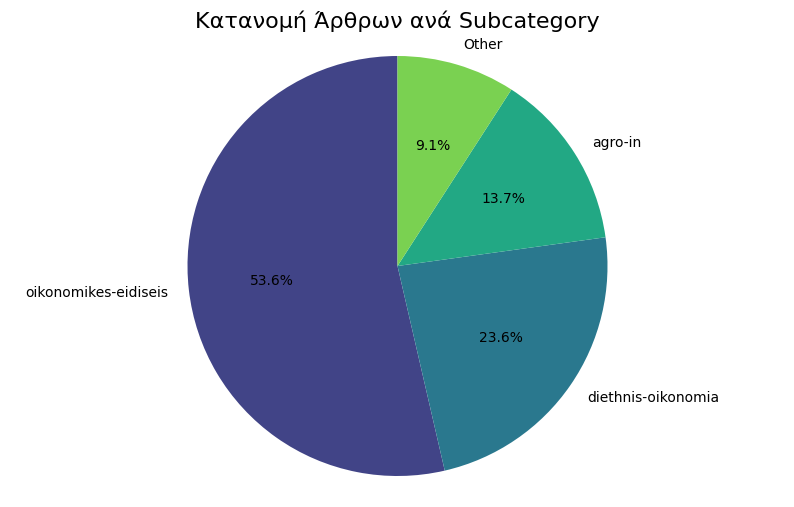

In [57]:
#Α. Απεικόνιση των υποκατηγοριών που ανεβαίνουν τα άρθρα

import pandas as pd

# Βήμα 1: Υπολογισμός της συχνότητας κάθε subcategory
subcategory_counts = df['subcategory'].value_counts()

# Βήμα 2: Εύρεση των subcategories που εμφανίζονται μόνο μία φορά
single_occurrence_subcategories = subcategory_counts[subcategory_counts == 1].index

# Βήμα 3: Αντικατάσταση αυτών των subcategories με την τιμή "Other"
df['subcategory'] = df['subcategory'].apply(lambda x: "Other" if x in single_occurrence_subcategories else x)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Υπολογισμός της κατανομής των subcategories
subcategory_counts = df['subcategory'].value_counts()

# Δημιουργία γραφήματος πίτας
colors = sns.color_palette('viridis', len(subcategory_counts))  # Επιλογή χρωμάτων
plt.figure(figsize=(10, 6))  # Ορισμός μεγέθους γραφήματος
plt.pie(subcategory_counts, labels=subcategory_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Κατανομή Άρθρων ανά Subcategory', fontsize=16)  # Προσθήκη τίτλου
plt.axis('equal')  # Εξασφάλιση ότι το γράφημα θα είναι κύκλος

# Προβολή του γραφήματος
plt.show()

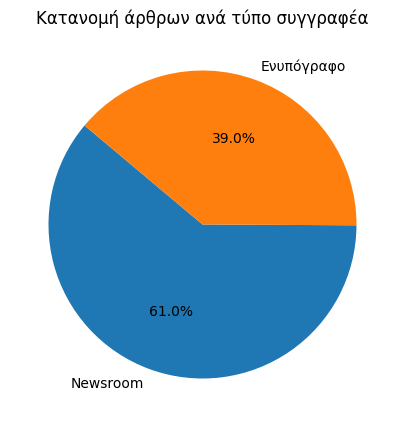

In [56]:
#Κατανομή newsroom Vs ενυπόγραφων
import pandas as pd
import matplotlib.pyplot as plt

# Υπολογισμός της κατανομής των τιμών
author_counts = df['Author_Clean'].value_counts()

# Δημιουργία διαγράμματος πίτας
plt.figure(figsize=(5, 5))
plt.pie(author_counts, labels=author_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Κατανομή άρθρων ανά τύπο συγγραφέα')
plt.show()


Μέσο μήκος άρθρου: 686.9264705882352 λέξεις


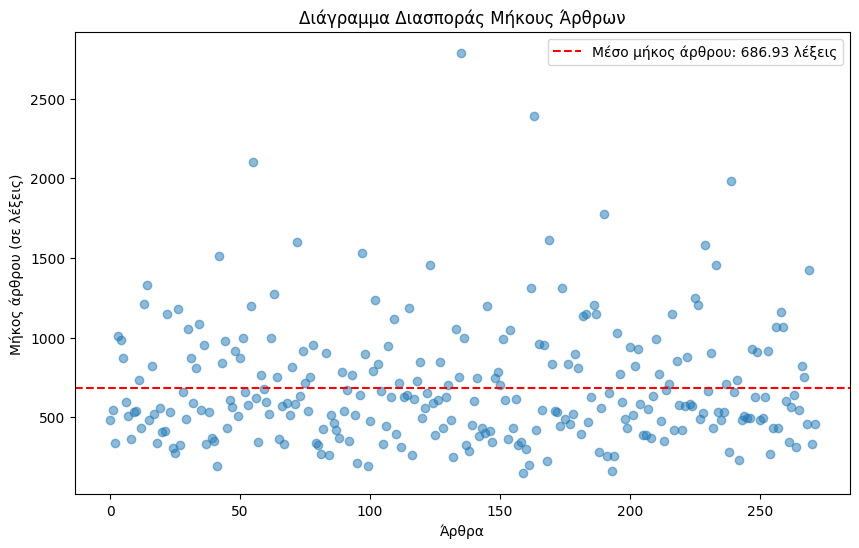

In [54]:
#Μέσο μήκος άρθρων και διασπορά

# Υπολογισμός του μήκους των άρθρων
df['article_length'] = df['extracted_text'].apply(lambda x: len(x.split()))

# Υπολογισμός του μέσου μήκους των άρθρων
mean_article_length = df['article_length'].mean()
print(f"Μέσο μήκος άρθρου: {mean_article_length} λέξεις")

# Δημιουργία διαγράμματος διασποράς
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['article_length'], alpha=0.5)
plt.axhline(mean_article_length, color='red', linestyle='--', label=f'Μέσο μήκος άρθρου: {mean_article_length:.2f} λέξεις')
plt.title('Διάγραμμα Διασποράς Μήκους Άρθρων')
plt.xlabel('Άρθρα')
plt.ylabel('Μήκος άρθρου (σε λέξεις)')
plt.legend()
plt.show()

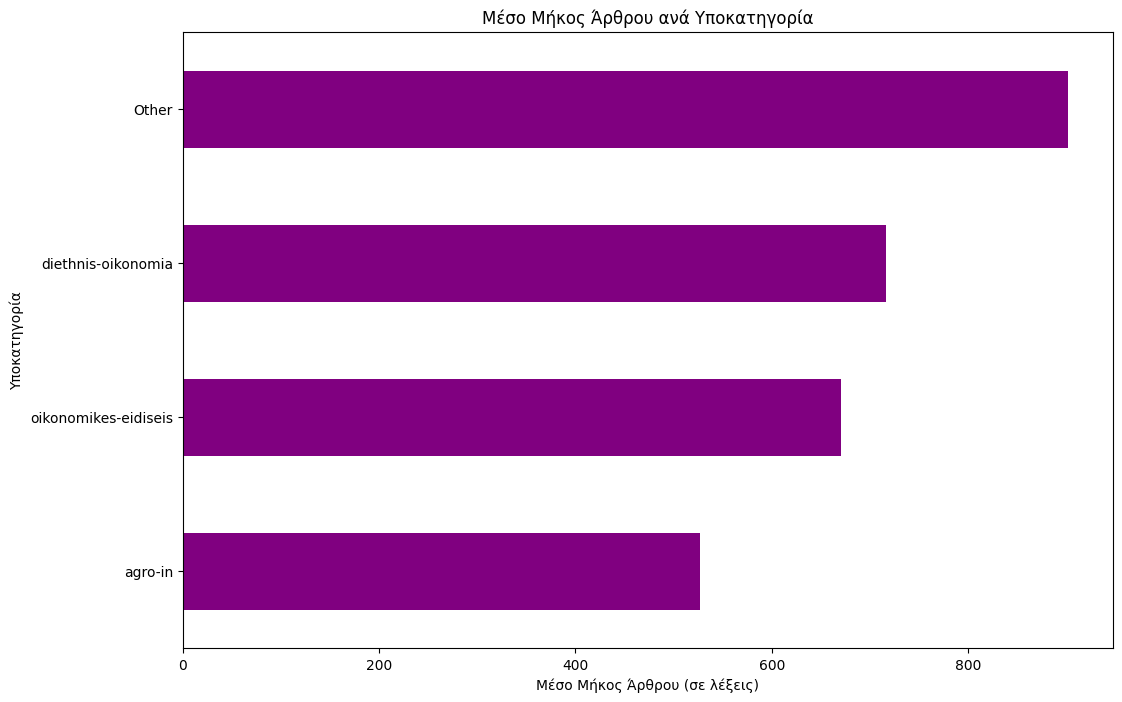

In [59]:
#Yπολογισμός μέσου μήκους άρθρου ανά υποκατηγορία

# Υπολογισμός του μήκους των άρθρων
df['article_length'] = df['extracted_text'].apply(lambda x: len(x.split()))

# Υπολογισμός του μέσου μήκους των άρθρων ανά υποκατηγορία
mean_length_per_subcategory = df.groupby('subcategory')['article_length'].mean().sort_values()

# Δημιουργία διαγράμματος
plt.figure(figsize=(12, 8))
mean_length_per_subcategory.plot(kind='barh', color='purple')
plt.title('Μέσο Μήκος Άρθρου ανά Υποκατηγορία')
plt.xlabel('Μέσο Μήκος Άρθρου (σε λέξεις)')
plt.ylabel('Υποκατηγορία')
plt.show()


*#7. Μπορείτε να δημιουργήσετε διάφορα γραφήματα από τα κείμενά σας όπως: (α) ένα wordcloud, (β) ένα διάγραμμα με τις 15 πιο συχνές λέξεις (γ) ένα διάγραμμα με τα πιο συχνά διγράμματα (bigrams).*

---



In [60]:
pip install matplotlib wordcloud nltk


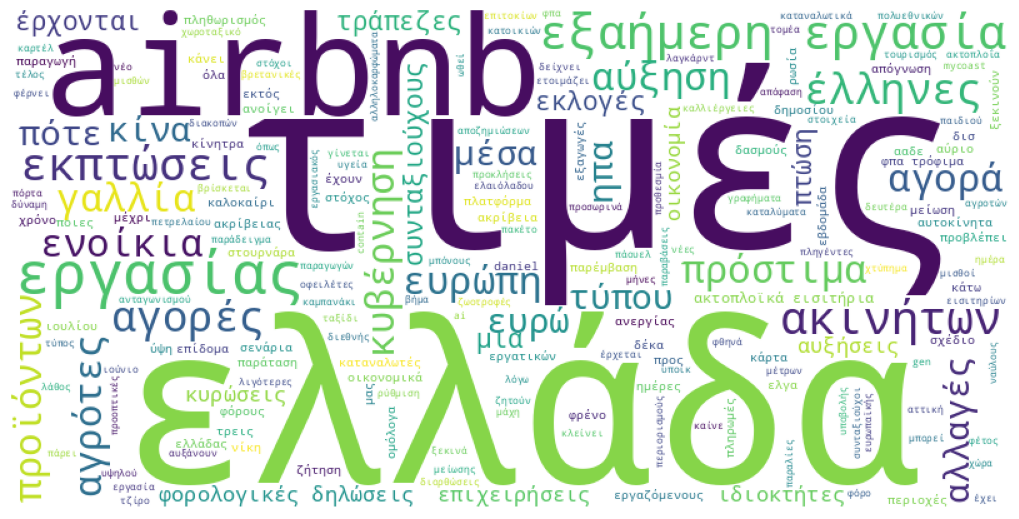

In [73]:
#A. Wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def remove_unwanted_words(text):
    unwanted_words = {"στα", "της", "στους", "τη","νέα", "evro pass", "ένας","εε","δηλώσεις ζητούν","ένα","μία","πού","τους", "στις","δύο", "θερινές", "γιατί","πώς","είναι", "από"}
    # Αφαιρούμε τις μονοσύλλαβες λέξεις και τις συγκεκριμένες ανεπιθύμητες λέξεις
    return ' '.join([word for word in text.split() if len(word) > 1 and word not in unwanted_words])


def generate_wordcloud(text):
    text = remove_unwanted_words(text)
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)
    plt.figure(figsize = (10, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

# Συνδυάστε όλα τα κείμενα από τη στήλη 'clean_title' σε ένα μεγάλο κείμενο
all_text = ' '.join(df['clean_title'].tolist())
generate_wordcloud(all_text)


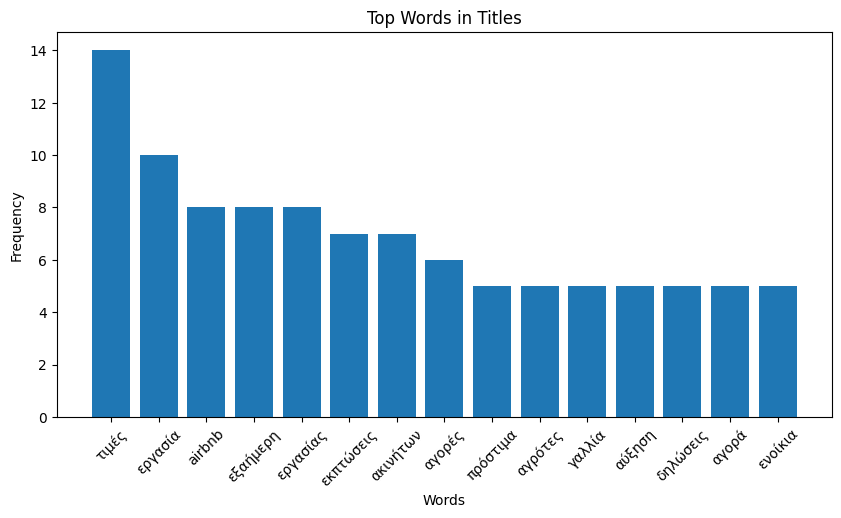

In [80]:
#B.Ένα διάγραμμα με τις 15 πιο συχνές λέξεις

from collections import Counter
import matplotlib.pyplot as plt

def remove_unwanted_words(text):
    unwanted_words = {"στα", "της", "στους", "τη","νέα", "ελλάδα","έλληνες","ευρώπη","εε","evro pass", "thessali", "όρο", "όλα","μέσο","ένας","ζητούν","ένα","μία","πού","τους", "στις","δύο", "θερινές", "γιατί","πώς","είναι", "από"}
    # Αφαιρούμε τις μονοσύλλαβες λέξεις και τις συγκεκριμένες ανεπιθύμητες λέξεις
    return ' '.join([word for word in text.split() if len(word) > 1 and word not in unwanted_words])

def plot_top_words(text, num_top_words=15):
    text = remove_unwanted_words(text)
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(num_top_words)

    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.title('Top Words in Titles')
    plt.show()

plot_top_words(all_text)


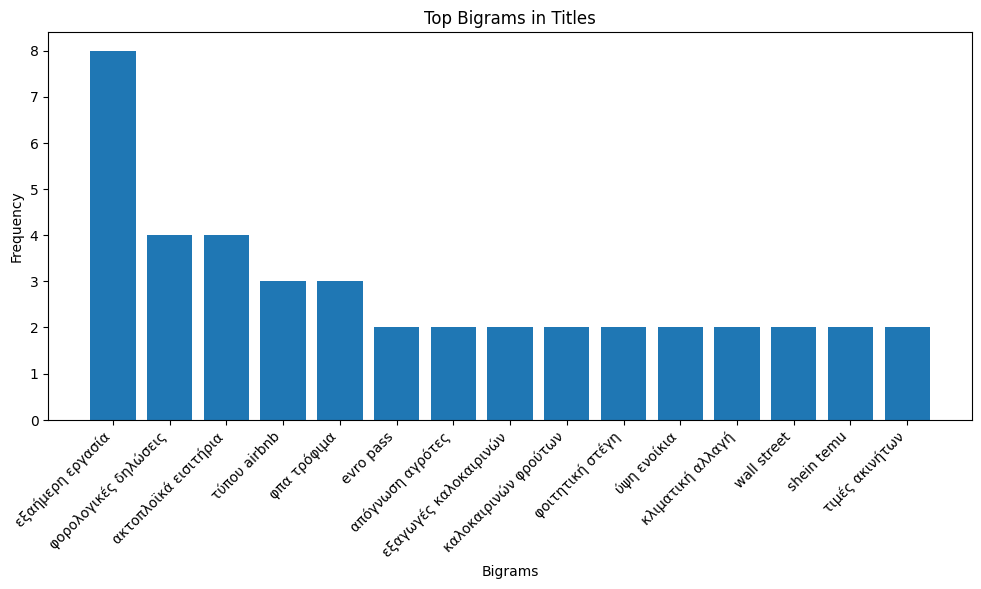

In [72]:
#Γ. ένα διάγραμμα με τα πιο συχνά διγράμματα (bigrams)

from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_bigrams(text, num_top_bigrams=15):
    # Αφαίρεση μονοσύλλαβων λέξεων και επεξεργασία κειμένου
    text = remove_unwanted_words(text)  # Βεβαιωθείτε ότι η συνάρτηση remove_unwanted_words έχει οριστεί σωστά
    words = text.split()
    bigram_counts = Counter(bigrams(words))
    top_bigrams = bigram_counts.most_common(num_top_bigrams)

    bigrams_labels = [' '.join(bg) for bg, count in top_bigrams]
    counts = [count for bg, count in top_bigrams]

    plt.figure(figsize=(10, 5))
    plt.bar(bigrams_labels, counts)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Ρύθμιση οριζόντιας διάταξης των ετικετών σε δεξιά για καλύτερη ορατότητα
    plt.title('Top Bigrams in Titles')
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Ρύθμιση του κάτω περιθωρίου για να μην κόβονται οι ετικέτες
    plt.show()

# Υποθέτοντας ότι all_text είναι η μεταβλητή που περιέχει όλα τα καθαρισμένα κείμενα
plot_top_bigrams(all_text)


*#8. Χρησιμοποιήστε το πεδίο της ημερομηνίας ως index στο dataframe που θα δημιουργήσετε ώστε να αξιοποιήσετε τις λειτουργίες της χρονοσειράς (resample()).*


In [69]:
import pandas as pd

# Συνάρτηση για εξαγωγή της ημερομηνίας από το URL
def extract_date_from_url(url):
    try:
        # Ημερομηνία βρίσκεται στις θέσεις 3, 4, και 5 του URL
        parts = url.split('/')
        date_str = f"{parts[3]}-{parts[4]}-{parts[5]}"
        return date_str
    except Exception as e:
        print(f"Error extracting date from {url}: {e}")
        return None

# Υποθέτουμε ότι έχετε ήδη το DataFrame df με τις στήλες 'title' και 'url'
# Εφαρμογή της συνάρτησης extract_date_from_url σε κάθε URL του DataFrame και δημιουργία νέας στήλης 'date_published'
df['date_published'] = df['url'].apply(extract_date_from_url)

# Μετατροπή της στήλης 'date_published' σε τύπο datetime
df['date_published'] = pd.to_datetime(df['date_published'], errors='coerce')

# Αφαίρεση των γραμμών με μη έγκυρες ημερομηνίες
df = df.dropna(subset=['date_published'])

# Ορισμός της στήλης 'date_published' ως index
df = df.set_index('date_published')

# Εμφάνιση του ενημερωμένου DataFrame
df

# Παράδειγμα χρήσης της μεθόδου resample() για εβδομαδιαία μέτρηση των άρθρων
weekly_articles = df.resample('W').size()

# Εμφάνιση του αποτελέσματος
weekly_articles

date_published
2024-06-30    106
2024-07-07    116
2024-07-14     50
Freq: W-SUN, dtype: int64

*9. Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.*

In [5]:
import pandas as pd

# Ορίστε τη διαδρομή του αρχείου
file_path = '/content/drive/My Drive/FinalData.csv'

# Φορτώστε το αρχείο CSV στο DataFrame
df = pd.read_csv(file_path)

In [6]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 46.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [8]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head(10)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ορμος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,υδρα,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,αγια τραπεζα,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,αμην,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,απατσι,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [10]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [22]:
import pandas as pd
import spacy
import unicodedata

# Φόρτωσε το CSV αρχείο που περιέχει τη στήλη clean_extracted_text
# Ορίστε τη διαδρομή του αρχείου
file_path = '/content/drive/My Drive/FinalData.csv'

# Φορτώστε το αρχείο CSV στο DataFrame
df = pd.read_csv(file_path)

# Κανονικοποίηση λέξεων για να ταιριάζουν με το λεξικό
def normalize_word(word):
    word = word.lower()
    word = ''.join(c for c in unicodedata.normalize('NFD', word) if unicodedata.category(c) != 'Mn')
    return word

# Κανονικοποίηση του λεξικού
emolex_df['word'] = emolex_df['word'].apply(normalize_word)

# Συνάρτηση για να υπολογίσουμε την πολικότητα και τα συναισθήματα
def analyze_sentiment(text):
    doc = nlp(text)
    word_list = [normalize_word(token.text) for token in doc]

    # Δημιουργία λεξικού για να αποθηκεύσουμε τα συναισθήματα και την πολικότητα
    sentiment_scores = {'Positive': 0, 'Negative': 0, 'Anger': 0, 'Anticipation': 0, 'Disgust': 0, 'Fear': 0, 'Joy': 0, 'Sadness': 0, 'Surprise': 0, 'Trust': 0}

    for word in word_list:
        if word in emolex_df['word'].values:
            row = emolex_df[emolex_df['word'] == word].iloc[0]
            sentiment_scores['Positive'] += row['Positive']
            sentiment_scores['Negative'] += row['Negative']
            sentiment_scores['Anger'] += row['Anger']
            sentiment_scores['Anticipation'] += row['Anticipation']
            sentiment_scores['Disgust'] += row['Disgust']
            sentiment_scores['Fear'] += row['Fear']
            sentiment_scores['Joy'] += row['Joy']
            sentiment_scores['Sadness'] += row['Sadness']
            sentiment_scores['Surprise'] += row['Surprise']
            sentiment_scores['Trust'] += row['Trust']

    return sentiment_scores

# Εφαρμογή της συνάρτησης στα κείμενα της στήλης clean_extracted_text
df['sentiment_scores'] = df['clean_extracted_text'].apply(analyze_sentiment)

# Δημιουργία νέων στηλών για κάθε συναίσθημα και πολικότητα
for sentiment in ['Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']:
    df[sentiment] = df['sentiment_scores'].apply(lambda x: x[sentiment])

# Διαγραφή της προσωρινής στήλης sentiment_scores
df = df.drop(columns=['sentiment_scores'])

# Εμφάνιση του DataFrame
df.head(20)

,title,url,extracted_text,clean_title,clean_extracted_text,subcategory,author,Author_Clean,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in,Newsroom,Newsroom,13.0,9.0,4.0,8.0,5.0,4.0,4.0,3.0,4.0,13.0
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis,Newsroom,Newsroom,14.0,8.0,3.0,3.0,3.0,4.0,2.0,1.0,0.0,15.0
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis,Newsroom,Newsroom,7.0,4.0,4.0,4.0,1.0,4.0,3.0,2.0,0.0,8.0
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο,29.0,28.0,5.0,17.0,11.0,2.0,5.0,5.0,3.0,11.0
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis,Newsroom,Newsroom,17.0,29.0,8.0,5.0,12.0,9.0,2.0,4.0,2.0,12.0
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...,oikonomikes-eidiseis,Μάχη Τράτσα,Ενυπόγραφο,15.0,20.0,7.0,10.0,7.0,10.0,2.0,7.0,2.0,9.0
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο,17.0,14.0,4.0,7.0,3.0,10.0,0.0,3.0,1.0,7.0
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...,oikonomikes-eidiseis,Μαρία Βουργάνα,Ενυπόγραφο,11.0,15.0,6.0,1.0,5.0,14.0,0.0,8.0,2.0,6.0
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...,oikonomikes-eidiseis,Κώστας Παπαδής,Ενυπόγραφο,6.0,11.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,6.0
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,φθηνότερα καταλύματα λιγότερες μέρες αναζητούν...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...,diakopes-fthinotera-katalymmata-kai-gia-ligote...,Newsroom,Newsroom,28.0,8.0,3.0,14.0,2.0,0.0,14.0,2.0,4.0,11.0


In [23]:
# Αποθήκευση του DataFrame ως αρχείο CSV
df.to_csv('FinalDataSentiment.csv', index=False)

from google.colab import files

files.download('FinalDataSentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# Φόρτωσε το CSV αρχείο που περιέχει τη στήλη clean_extracted_text
# Ορίστε τη διαδρομή του αρχείου
file_path = '/content/drive/My Drive/FinalDataSentiment.csv'

# Φορτώστε το αρχείο CSV στο DataFrame
df = pd.read_csv(file_path)

df.head(10)

,title,url,extracted_text,clean_title,clean_extracted_text,subcategory,author,Author_Clean,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in,Newsroom,Newsroom,13.0,9.0,4.0,8.0,5.0,4.0,4.0,3.0,4.0,13.0
1,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis,Newsroom,Newsroom,14.0,8.0,3.0,3.0,3.0,4.0,2.0,1.0,0.0,15.0
2,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis,Newsroom,Newsroom,7.0,4.0,4.0,4.0,1.0,4.0,3.0,2.0,0.0,8.0
3,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο,29.0,28.0,5.0,17.0,11.0,2.0,5.0,5.0,3.0,11.0
4,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis,Newsroom,Newsroom,17.0,29.0,8.0,5.0,12.0,9.0,2.0,4.0,2.0,12.0
5,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...,oikonomikes-eidiseis,Μάχη Τράτσα,Ενυπόγραφο,15.0,20.0,7.0,10.0,7.0,10.0,2.0,7.0,2.0,9.0
6,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο,17.0,14.0,4.0,7.0,3.0,10.0,0.0,3.0,1.0,7.0
7,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...,oikonomikes-eidiseis,Μαρία Βουργάνα,Ενυπόγραφο,11.0,15.0,6.0,1.0,5.0,14.0,0.0,8.0,2.0,6.0
8,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...,oikonomikes-eidiseis,Κώστας Παπαδής,Ενυπόγραφο,6.0,11.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,6.0
9,Φθηνότερα καταλύματα και για λιγότερες μέρες α...,https://www.in.gr/2024/07/10/economy/diakopes-...,Μπορεί ο ένας στους δύο Έλληνες να μην πηγαίνε...,φθηνότερα καταλύματα λιγότερες μέρες αναζητούν...,μπορεί ένας στους δύο έλληνες πηγαίνει ούτε φέ...,diakopes-fthinotera-katalymmata-kai-gia-ligote...,Newsroom,Newsroom,28.0,8.0,3.0,14.0,2.0,0.0,14.0,2.0,4.0,11.0


*10. Δημιουργήστε γραφήματα ομαδοποιώντας μέσω του resample() την πολικότητα των άρθρων σας ανά ημέρα/μήνα/3μηνο/έτος ανάλογα με το θέμα.*

In [45]:
#Πρώτα ενσωματώνω στήλη με ημερομηνία

import pandas as pd

# Εξαγωγή της ημερομηνίας από τα links και μετατροπή σε datetime
df['date'] = df['url'].str.extract(r'/(\d{4}/\d{2}/\d{2})/')
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# Εμφάνιση του DataFrame
df.head(10)

,title,url,extracted_text,clean_title,clean_extracted_text,subcategory,author,Author_Clean,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Polarity,date
date,,,,,,,,,,,,,,,,,,,,
2024-07-10,Χαμηλές τιμές για το σκληρό σιτάρι - Σε απόγνω...,https://www.in.gr/2024/07/10/economy/agro-in/s...,Σε δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκ...,χαμηλές τιμές σκληρό σιτάρι απόγνωση παραγωγοί,δυσμενή θέση έχουν περιέλθει οιπαραγωγοί σκληρ...,agro-in,Newsroom,Newsroom,13.0,9.0,4.0,8.0,5.0,4.0,4.0,3.0,4.0,13.0,4.0,2024-07-10
2024-07-10,Στα έργα του Ταμείου Ανάκαμψης εντάχθηκε ο εντ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Στο Ταμείο Ανάκαμψηςεντάσσεται έργο για τα αυθ...,στα έργα ταμείου ανάκαμψης εντάχθηκε εντοπισμό...,ταμείο ανάκαμψηςεντάσσεται έργο αυθαίρετακαι ε...,oikonomikes-eidiseis,Newsroom,Newsroom,14.0,8.0,3.0,3.0,3.0,4.0,2.0,1.0,0.0,15.0,6.0,2024-07-10
2024-07-10,Πλήθος καταγγελιών στο MyCoast για τις παραβάσ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Kαταιγισμό καταγγελιών δέχεται η πλατφόρμα«My ...,πλήθος καταγγελιών mycoast παραβάσεις στις παρ...,kαταιγισμό καταγγελιών δέχεται πλατφόρμαmi coa...,oikonomikes-eidiseis,Newsroom,Newsroom,7.0,4.0,4.0,4.0,1.0,4.0,3.0,2.0,0.0,8.0,3.0,2024-07-10
2024-07-10,Πώς θα εφαρμοστεί η παρέμβαση για τους νέους α...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Από τις 11 έως τις 25 Ιουλίου 2024 τίθονται σε...,πώς εφαρμοστεί παρέμβαση τους νέους αγρότες όλ...,από 11 έως 25 ιουλίου 2024 τίθονται διαβούλευσ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο,29.0,28.0,5.0,17.0,11.0,2.0,5.0,5.0,3.0,11.0,1.0,2024-07-10
2024-07-10,Οδικός χάρτης υποβολής αίτησης για την ρύθμιση...,https://www.in.gr/2024/07/10/economy/oikonomik...,Είδαμε στο προηγούμενο σημείωμα ποιεςοφειλέςμπ...,οδικός χάρτης υποβολής αίτησης ρύθμιση χρεών δ...,είδαμε προηγούμενο σημείωμα ποιεςοφειλέςμπορού...,oikonomikes-eidiseis,Newsroom,Newsroom,17.0,29.0,8.0,5.0,12.0,9.0,2.0,4.0,2.0,12.0,-12.0,2024-07-10
2024-07-10,«Φρένο» στα μπόνους δόμησης από το δήμο Αθηναίων,https://www.in.gr/2024/07/10/economy/oikonomik...,«Φρένο» για μια διετία στην έκδοση οικοδομικών...,φρένο στα μπόνους δόμησης από δήμο αθηναίων,φρένο μια διετία έκδοση οικοδομικών αδειών κάν...,oikonomikes-eidiseis,Μάχη Τράτσα,Ενυπόγραφο,15.0,20.0,7.0,10.0,7.0,10.0,2.0,7.0,2.0,9.0,-5.0,2024-07-10
2024-07-10,Βαρύ το φορτίο του κόστους παραγωγής – «Πληγή»...,https://www.in.gr/2024/07/10/economy/agro-in/k...,Σε δύσκολα μονοπάτιασυνεχίζει να βαδίζει η ελλ...,βαρύ φορτίο κόστους παραγωγής πληγή τους κτηνο...,δύσκολα μονοπάτιασυνεχίζει βαδίζει ελληνική κτ...,agro-in,Ανθή Γεωργίου,Ενυπόγραφο,17.0,14.0,4.0,7.0,3.0,10.0,0.0,3.0,1.0,7.0,3.0,2024-07-10
2024-07-10,Το Σεπτέμβριο οι πρώτες διασταυρώσεις για τα α...,https://www.in.gr/2024/07/10/economy/oikonomik...,Σφίγγει ο κλοιός γύρω από τους ιδιοκτήτες ανασ...,σεπτέμβριο πρώτες διασταυρώσεις ανασφάλιστα οχ...,σφίγγει κλοιός γύρω από τους ιδιοκτήτες ανασφά...,oikonomikes-eidiseis,Μαρία Βουργάνα,Ενυπόγραφο,11.0,15.0,6.0,1.0,5.0,14.0,0.0,8.0,2.0,6.0,-4.0,2024-07-10
2024-07-10,Στην τελική ευθεία οι αλλαγές στο επίδομα ανερ...,https://www.in.gr/2024/07/10/economy/oikonomik...,Προς το τέλος του έτους τοποθετείται η εφαρμογ...,τελική ευθεία αλλαγές επίδομα ανεργίας,προς τέλος έτους τοποθετείται εφαρμογή αλλαγών...,oikonomikes-eidiseis,Κώστας Παπαδής,Ενυπόγραφο,6.0,11.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,6.0,-5.0,2024-07-10


In [47]:
#Μετά εξάγω συμπεράσματα για ημέρα - εβδομάδα

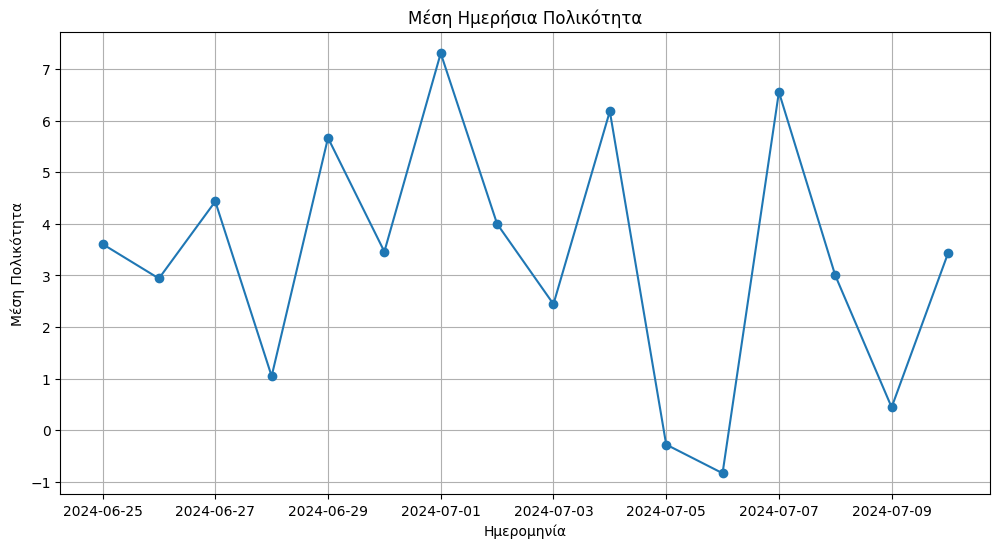

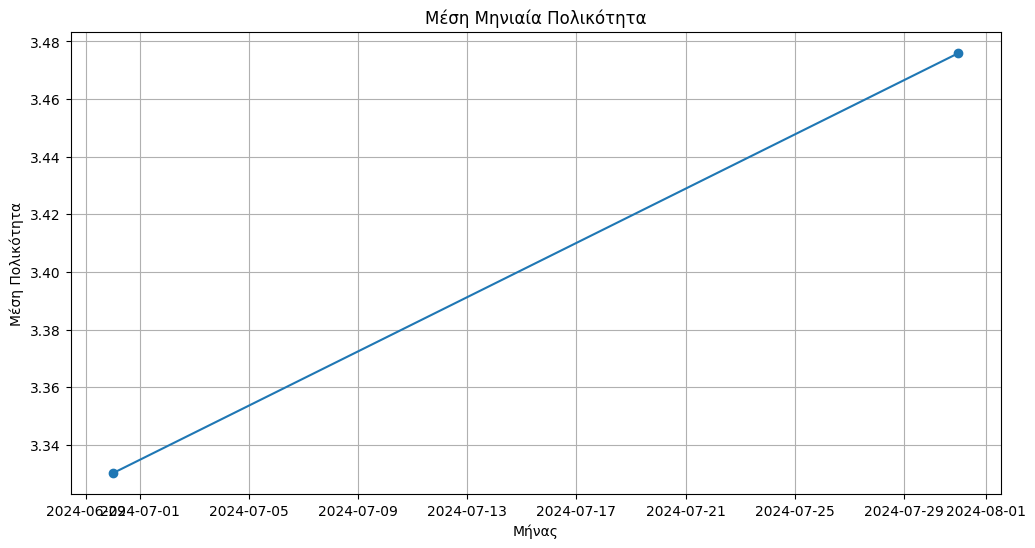

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Υπολογισμός της πολικότητας ως τη διαφορά μεταξύ positive και negative
df['Polarity'] = df['Positive'] - df['Negative']

# Ορισμός της στήλης ημερομηνίας ως index
df.set_index('date', inplace=True)

# Ομαδοποίηση ανά ημέρα και υπολογισμός της μέσης πολικότητας
daily_polarity = df['Polarity'].resample('D').mean()

# Ομαδοποίηση ανά μήνα και υπολογισμός της μέσης πολικότητας
monthly_polarity = df['Polarity'].resample('M').mean()

# Δημιουργία γραφήματος για την ημερήσια πολικότητα
plt.figure(figsize=(12, 6))
plt.plot(daily_polarity.index, daily_polarity, marker='o', linestyle='-')
plt.title('Μέση Ημερήσια Πολικότητα')
plt.xlabel('Ημερομηνία')
plt.ylabel('Μέση Πολικότητα')
plt.grid(True)
plt.show()

# Δημιουργία γραφήματος για τη μηνιαία πολικότητα
plt.figure(figsize=(12, 6))
plt.plot(monthly_polarity.index, monthly_polarity, marker='o', linestyle='-')
plt.title('Μέση Μηνιαία Πολικότητα')
plt.xlabel('Μήνας')
plt.ylabel('Μέση Πολικότητα')
plt.grid(True)
plt.show()


*11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου heatmap.*

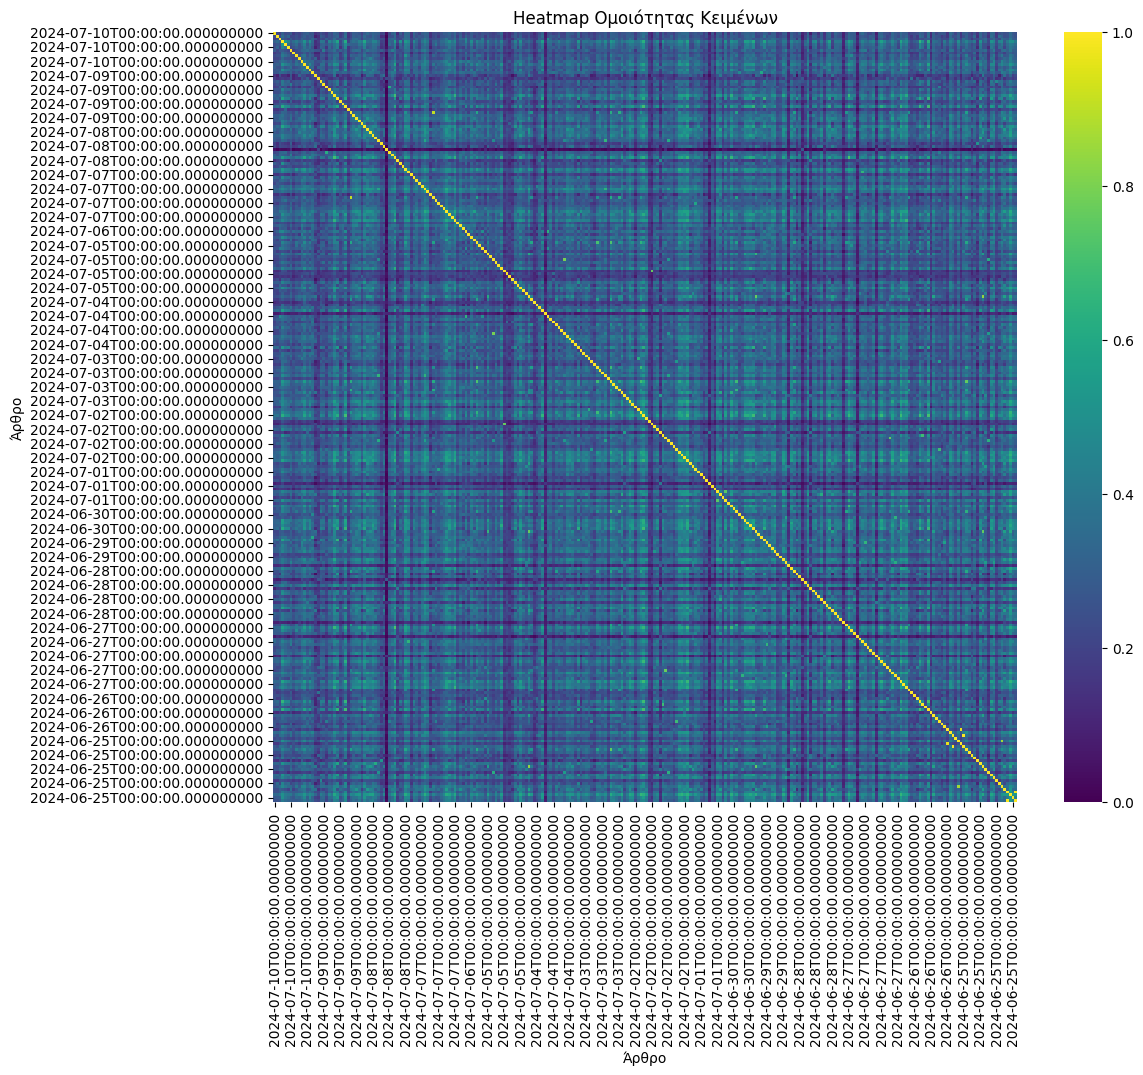

In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


# Δημιουργία του CountVectorizer
vectorizer = CountVectorizer()

# Μετατροπή των κειμένων σε διανύσματα
X = vectorizer.fit_transform(df['clean_extracted_text'])

# Υπολογισμός της ομοιότητας των κειμένων με τη συνάρτηση cosine_similarity
cosine_sim = cosine_similarity(X)

# Δημιουργία DataFrame από τον πίνακα ομοιότητας
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

# Δημιουργία heatmap για την παρουσίαση της συσχέτισης
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, cmap='viridis')
plt.title('Heatmap Ομοιότητας Κειμένων')
plt.xlabel('Άρθρο')
plt.ylabel('Άρθρο')
plt.show()
